# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, classification_report, confusion_matrix,
                             roc_curve, auc, roc_auc_score)
from sklearn.preprocessing import label_binarize
import pickle
import time

In [2]:
print("NOTEBOOK 06: MODEL TRAINING - LOGISTIC REGRESSION")

NOTEBOOK 06: MODEL TRAINING - LOGISTIC REGRESSION


In [3]:
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("husl")

#  Load Prepared Datasets

Load training and testing sets (Standard scaled)

In [4]:
X_train=np.load("../data/processed/ml_ready/X_train_scaled.npy")
X_test=np.load("../data/processed/ml_ready/X_test_scaled.npy")
y_train=np.load("../data/processed/ml_ready/y_train.npy")
y_test=np.load("../data/processed/ml_ready/y_test.npy")

Load feature names

In [5]:
with open("../data/processed/ml_ready/feature_names.pkl","rb") as f:
    feature_names=pickle.load(f)

Load label encoder

In [6]:
with open("../models/label_encoder.pkl","rb") as f:
    label_encoder=pickle.load(f)

In [7]:
print("\n Dataset Summary:")
print(f"Training samples:{X_train.shape[0]:,}")
print(f"Testing samples:{X_test.shape[0]:,}")
print(f"Number of features:{X_train.shape[1]:,}")
print(f"Number of classes:{len(np.unique(y_train)):,}")
print(f"Class labels:{label_encoder.classes_.tolist()}")


 Dataset Summary:
Training samples:1,760
Testing samples:440
Number of features:39
Number of classes:22
Class labels:['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee', 'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize', 'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya', 'pigeonpeas', 'pomegranate', 'rice', 'watermelon']


# Logistic Regression Overview

In [8]:
print("LOGISTIC REGRESSION - ALGORITHM OVERVIEW")

LOGISTIC REGRESSION - ALGORITHM OVERVIEW


In [9]:
overview = """
📚 LOGISTIC REGRESSION:

🎯 TYPE: Linear Classification Algorithm

📐 MATHEMATICAL FORMULA:
   P(y=1|X) = 1 / (1 + e^(-(β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ)))
   
   where:
   • P(y=1|X) = Probability of class 1 given features X
   • β₀ = Intercept
   • β₁, β₂, ..., βₙ = Coefficients for features
   • e = Euler's number (≈2.718)

🔄 FOR MULTI-CLASS (22 crops):
   • Uses One-vs-Rest (OvR) strategy
   • Creates 22 binary classifiers
   • Each predicts probability for one crop
   • Final prediction = class with highest probability

✅ ADVANTAGES:
   • Fast training and prediction
   • Probabilistic outputs (confidence scores)
   • Good baseline model
   • Works well with scaled features
   • Interpretable coefficients

❌ LIMITATIONS:
   • Assumes linear decision boundaries
   • May underfit complex patterns
   • Sensitive to feature scaling
   • Requires more samples than features

🎯 BEST FOR:
   • Baseline model establishment
   • Binary and multi-class classification
   • When interpretability is important
   • Linearly separable data
"""

print(overview)

print("\n" + "="*80)
print("TRAINING LOGISTIC REGRESSION MODEL")
print("="*80)

# Model configuration
model_params = {
    'solver': 'lbfgs',             # Limited-memory BFGS optimizer
    'max_iter': 1000,              # Maximum iterations
    'random_state': 42,            # Reproducibility
    'n_jobs': -1                   # Use all CPU cores
}

print(f"\n MODEL CONFIGURATION:")
for param, value in model_params.items():
    print(f"  • {param}: {value}")

# Initialize model
log_reg = LogisticRegression(**model_params)

# Train model
print(f"\n🔄 Training Logistic Regression model...")
start_time = time.time()

log_reg.fit(X_train, y_train)

training_time = time.time() - start_time

print(f"\n✅ Model trained successfully!")
print(f"  • Training time: {training_time:.4f} seconds")
print(f"  • Number of iterations: {log_reg.n_iter_}")
print(f"  • Number of classes: {len(log_reg.classes_)}")


📚 LOGISTIC REGRESSION:

🎯 TYPE: Linear Classification Algorithm

📐 MATHEMATICAL FORMULA:
   P(y=1|X) = 1 / (1 + e^(-(β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ)))

   where:
   • P(y=1|X) = Probability of class 1 given features X
   • β₀ = Intercept
   • β₁, β₂, ..., βₙ = Coefficients for features
   • e = Euler's number (≈2.718)

🔄 FOR MULTI-CLASS (22 crops):
   • Uses One-vs-Rest (OvR) strategy
   • Creates 22 binary classifiers
   • Each predicts probability for one crop
   • Final prediction = class with highest probability

✅ ADVANTAGES:
   • Fast training and prediction
   • Probabilistic outputs (confidence scores)
   • Good baseline model
   • Works well with scaled features
   • Interpretable coefficients

❌ LIMITATIONS:
   • Assumes linear decision boundaries
   • May underfit complex patterns
   • Sensitive to feature scaling
   • Requires more samples than features

🎯 BEST FOR:
   • Baseline model establishment
   • Binary and multi-class classification
   • When interpretability is im

c:\Users\Prathamesh Gawas\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)


# Make Predictions

In [10]:
print("MAKING PREDICTIONS")

MAKING PREDICTIONS


Predictions on training set

In [11]:
print("\nMaking predictions on training set...")
start_time=time.time()
y_train_pred=log_reg.predict(X_train)
y_train_pred_proba=log_reg.predict_proba(X_train)
train_pred_time=time.time() - start_time


Making predictions on training set...


Predictions on testing set

In [12]:
print("Making predictions on testing set...")
start_time=time.time()
y_test_pred=log_reg.predict(X_test)
y_test_pred_proba=log_reg.predict_proba(X_test)
test_pred_time=time.time() - start_time

Making predictions on testing set...


In [13]:
print("Predictions completed!")
print(f"Train prediction time: {train_pred_time:.4f} seconds")
print(f"Test prediction time: {test_pred_time:.4f} seconds")
print(f"Avg prediction time per sample: {test_pred_time/len(y_test)*1000:.4f} ms")

Predictions completed!
Train prediction time: 0.0037 seconds
Test prediction time: 0.0012 seconds
Avg prediction time per sample: 0.0028 ms


Show sample predictions

In [14]:
print("Sample predictions (First 10 test samples):")
sample_df=pd.DataFrame({
    "True Label":[label_encoder.classes_[i] for i in y_test[:10]],
    "Predicted Label":[label_encoder.classes_[i] for i in y_test_pred[:10]],
    "Confidence": [np.max(y_test_pred_proba[i]) * 100 for i in range(10)],
    "Confidence":[np.max(y_test_pred_proba[i]) * 100 for i in range(10)],
    "Match":["OK" if y_test[i]==y_test_pred[i] else "MISS" for i in range(10)]
})

print(sample_df.to_string(index=False))

Sample predictions (First 10 test samples):
True Label Predicted Label  Confidence Match
    orange          orange   98.200688    OK
    banana          banana   94.284866    OK
    cotton          cotton   99.615649    OK
     maize           maize   99.692444    OK
    orange           maize   54.091491  MISS
  chickpea        chickpea   99.926883    OK
      rice            rice   98.755908    OK
 blackgram       blackgram   85.744705    OK
    banana          banana   99.478803    OK
    orange          orange   99.977188    OK


#  Model Performance Metrics

In [15]:
print("MODEL PERFORMANCE EVALUATION")

MODEL PERFORMANCE EVALUATION


Calculate metrics for training set

In [16]:
train_accuracy=accuracy_score(y_train,y_train_pred)
train_precision=precision_score(y_train,y_train_pred,average='weighted',zero_division=0)
train_recall=recall_score(y_train,y_train_pred,average="weighted",zero_division=0)
train_f1=f1_score(y_train,y_train_pred,average="weighted",zero_division=0)

Calculate metrics for testing set

In [17]:
test_accuracy=accuracy_score(y_test,y_test_pred)
test_precision=precision_score(y_test,y_test_pred,average='weighted',zero_division=0)
test_recall=recall_score(y_test,y_test_pred,average="weighted",zero_division=0)
test_f1=f1_score(y_test,y_test_pred,average="weighted",zero_division=0)

In [18]:
print("\n Training Set Performance:")
print(f"Accuracy: {train_accuracy * 100:.2f} %")
print(f"Precision: {train_precision * 100:.2f} %")
print(f"Recall: {train_recall * 100:.2f} %")
print(f"F1-Score: {train_f1 * 100:.2f} %")


 Training Set Performance:
Accuracy: 98.86 %
Precision: 98.88 %
Recall: 98.86 %
F1-Score: 98.86 %


In [19]:
print(f"\nTESTING SET PERFORMANCE:")
print(f"Accuracy: {test_accuracy * 100:.2f} %")
print(f"Precision: {test_precision * 100:.2f} %")   
print(f"Recall: {test_recall * 100:.2f} %")
print(f"F1-Score: {test_f1 * 100:.2f} %")


TESTING SET PERFORMANCE:
Accuracy: 97.73 %
Precision: 97.93 %
Recall: 97.73 %
F1-Score: 97.71 %


Check for overfitting

In [20]:
print("\n Overfitting Analysis:")
accuracy_diff=train_accuracy - test_accuracy
print(f"Train-Test Accuracy Difference: {accuracy_diff * 100:.2f} %")


 Overfitting Analysis:
Train-Test Accuracy Difference: 1.14 %


In [21]:
if accuracy_diff <0.02:
    print("Status:Excellent (No overfitting)")
elif accuracy_diff <0.05:
    print("Status:Good (Mild overfitting)")
elif accuracy_diff <0.10:
    print("Status:Moderate (Noticeable overfitting)")   
else:
    print("Status:Severe (Significant overfitting)")

Status:Excellent (No overfitting)


# Detailed Classification Report

In [22]:
print("dETAILED CLASSIFICATION REPORT")

dETAILED CLASSIFICATION REPORT


Generate classification report

In [23]:
print("\n Classification Report (Testing Set):")
report=classification_report(y_test,y_test_pred,target_names=label_encoder.classes_,digits=4)
print(report)


 Classification Report (Testing Set):
              precision    recall  f1-score   support

       apple     1.0000    1.0000    1.0000        20
      banana     1.0000    1.0000    1.0000        20
   blackgram     0.9524    1.0000    0.9756        20
    chickpea     1.0000    1.0000    1.0000        20
     coconut     1.0000    1.0000    1.0000        20
      coffee     1.0000    1.0000    1.0000        20
      cotton     0.8696    1.0000    0.9302        20
      grapes     1.0000    1.0000    1.0000        20
        jute     0.8696    1.0000    0.9302        20
 kidneybeans     1.0000    1.0000    1.0000        20
      lentil     1.0000    0.8500    0.9189        20
       maize     0.9444    0.8500    0.8947        20
       mango     1.0000    1.0000    1.0000        20
   mothbeans     0.9091    1.0000    0.9524        20
    mungbean     1.0000    1.0000    1.0000        20
   muskmelon     1.0000    1.0000    1.0000        20
      orange     1.0000    0.9500    0.974

In [24]:
report_dict=classification_report(y_test,y_test_pred,target_names=label_encoder.classes_,output_dict=True)
report_df=pd.DataFrame(report_dict).transpose()
report_df=report_df.round(4)

In [25]:
report_df.to_csv('../data/results/logistic_regression_classification_report.csv')
print("\nClassification report saved to: ../data/results/logistic_regression_classification_report.csv")


Classification report saved to: ../data/results/logistic_regression_classification_report.csv


#  Confusion Matrix

In [26]:
print("CONFUSION MATRIX")

CONFUSION MATRIX


In [27]:
cm=confusion_matrix(y_test,y_test_pred)

In [28]:
print(f"Confusion Matrix Shape: {cm.shape}")
print("Rows: True Labels")
print("Columns: Predicted Labels")

Confusion Matrix Shape: (22, 22)
Rows: True Labels
Columns: Predicted Labels



Saved: 24_logistic_regression_confusion_matrix.png


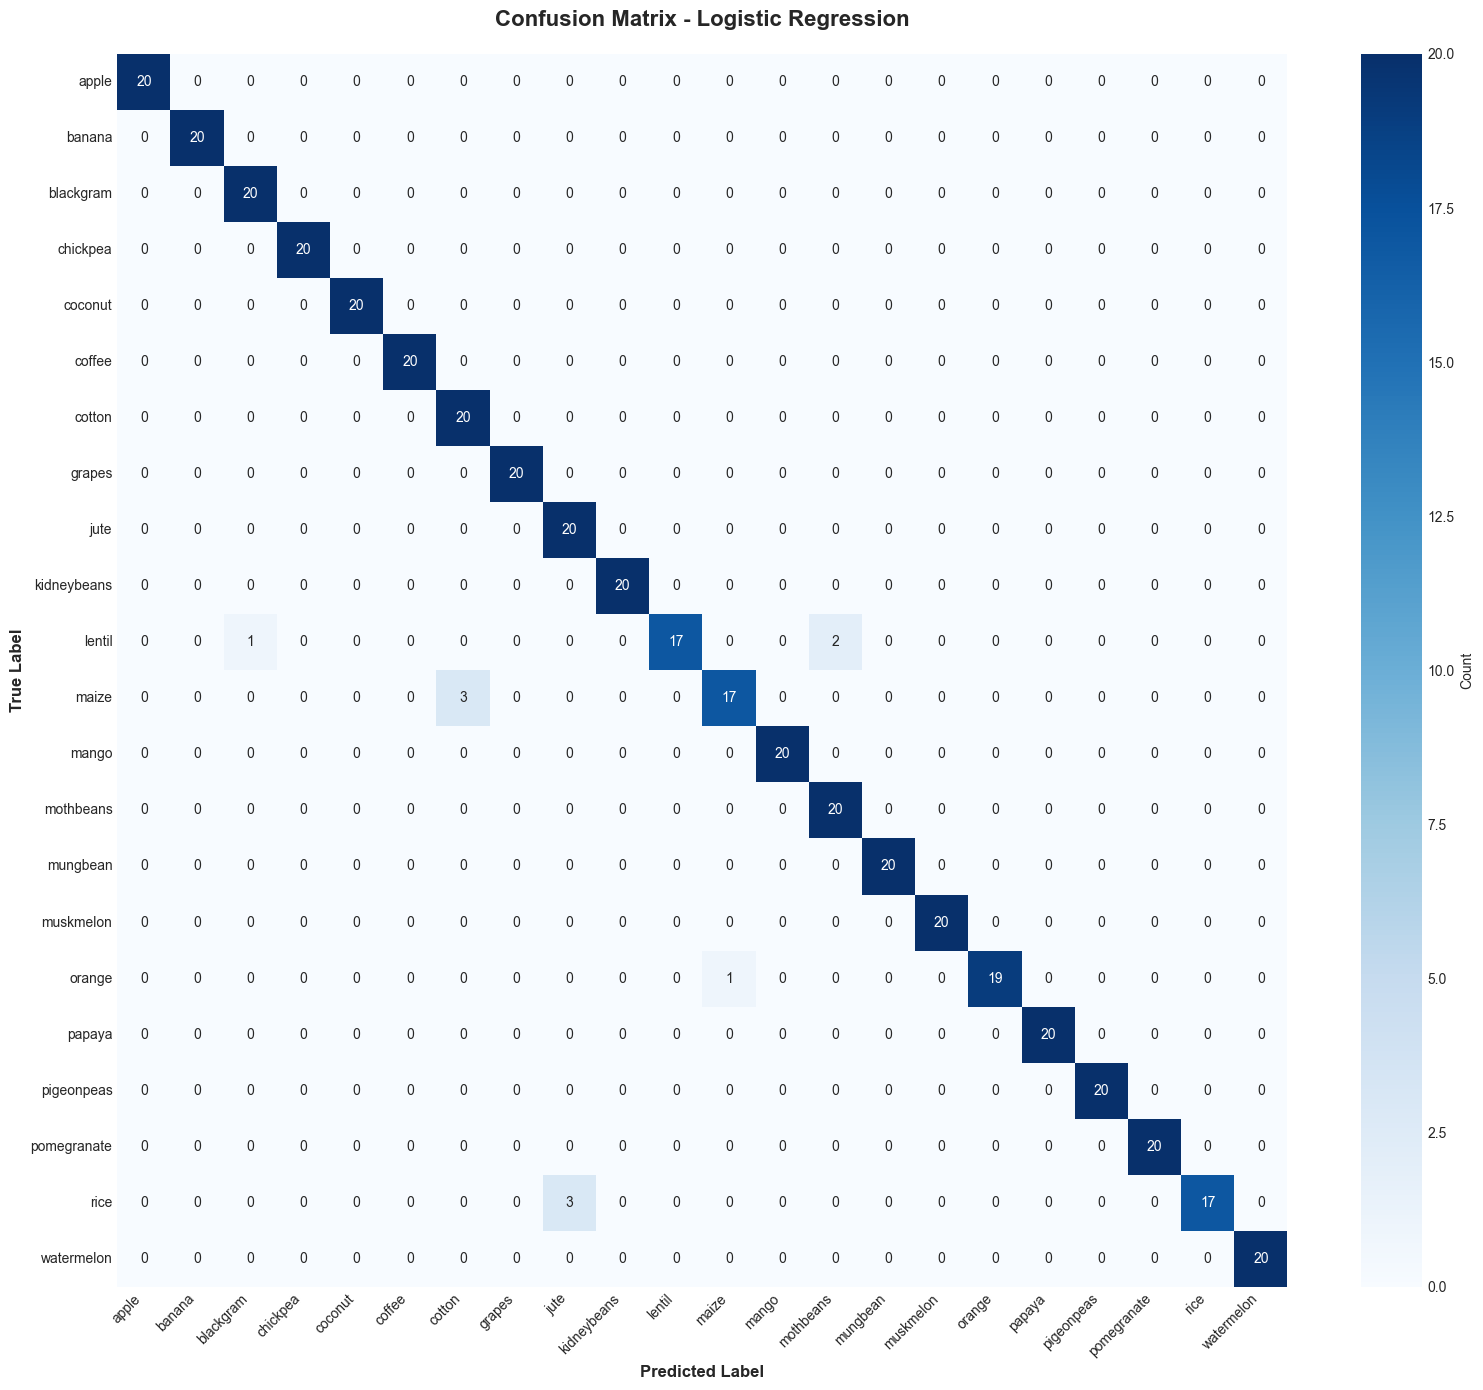

In [29]:
plt.figure(figsize=(16,14))
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_,
            cbar_kws={"label":"Count"})

plt.title("Confusion Matrix - Logistic Regression",fontsize=16,fontweight="bold",pad=20)
plt.xlabel("Predicted Label",fontsize=12,fontweight="bold")
plt.ylabel("True Label",fontsize=12,fontweight="bold")
plt.xticks(rotation=45,ha="right")
plt.yticks(rotation=0)

plt.tight_layout()
plt.savefig('../data/visualizations/24_logistic_regression_confusion_matrix.png', dpi=300, bbox_inches='tight')
print("\nSaved: 24_logistic_regression_confusion_matrix.png")
plt.show()

Calculate confusion matrix statistics

In [30]:
diagonal_sum=np.trace(cm)
total_sum=np.sum(cm)
off_diagonal_sum=total_sum - diagonal_sum

In [31]:
print("Confusion Matrix Analysis:")
print(f"Correct Predictions (Diagonal Sum): {diagonal_sum} ({diagonal_sum/total_sum*100:.2f} %)")
print(f"Incorrect Predictions (Off-Diagonal Sum): {off_diagonal_sum} ({off_diagonal_sum/total_sum*100:.2f} %)")
print(f"Total Predictions: {total_sum} ")

Confusion Matrix Analysis:
Correct Predictions (Diagonal Sum): 430 (97.73 %)
Incorrect Predictions (Off-Diagonal Sum): 10 (2.27 %)
Total Predictions: 440 


Normalized Confusion Matrix

In [32]:
print("NORMALIZED CONFUSION MATRIX")

NORMALIZED CONFUSION MATRIX


Normalize confusion matrix by row (true labels)

In [33]:
cm_normalized=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]


Saved: 25_logistic_regression_confusion_matrix_normalized.png


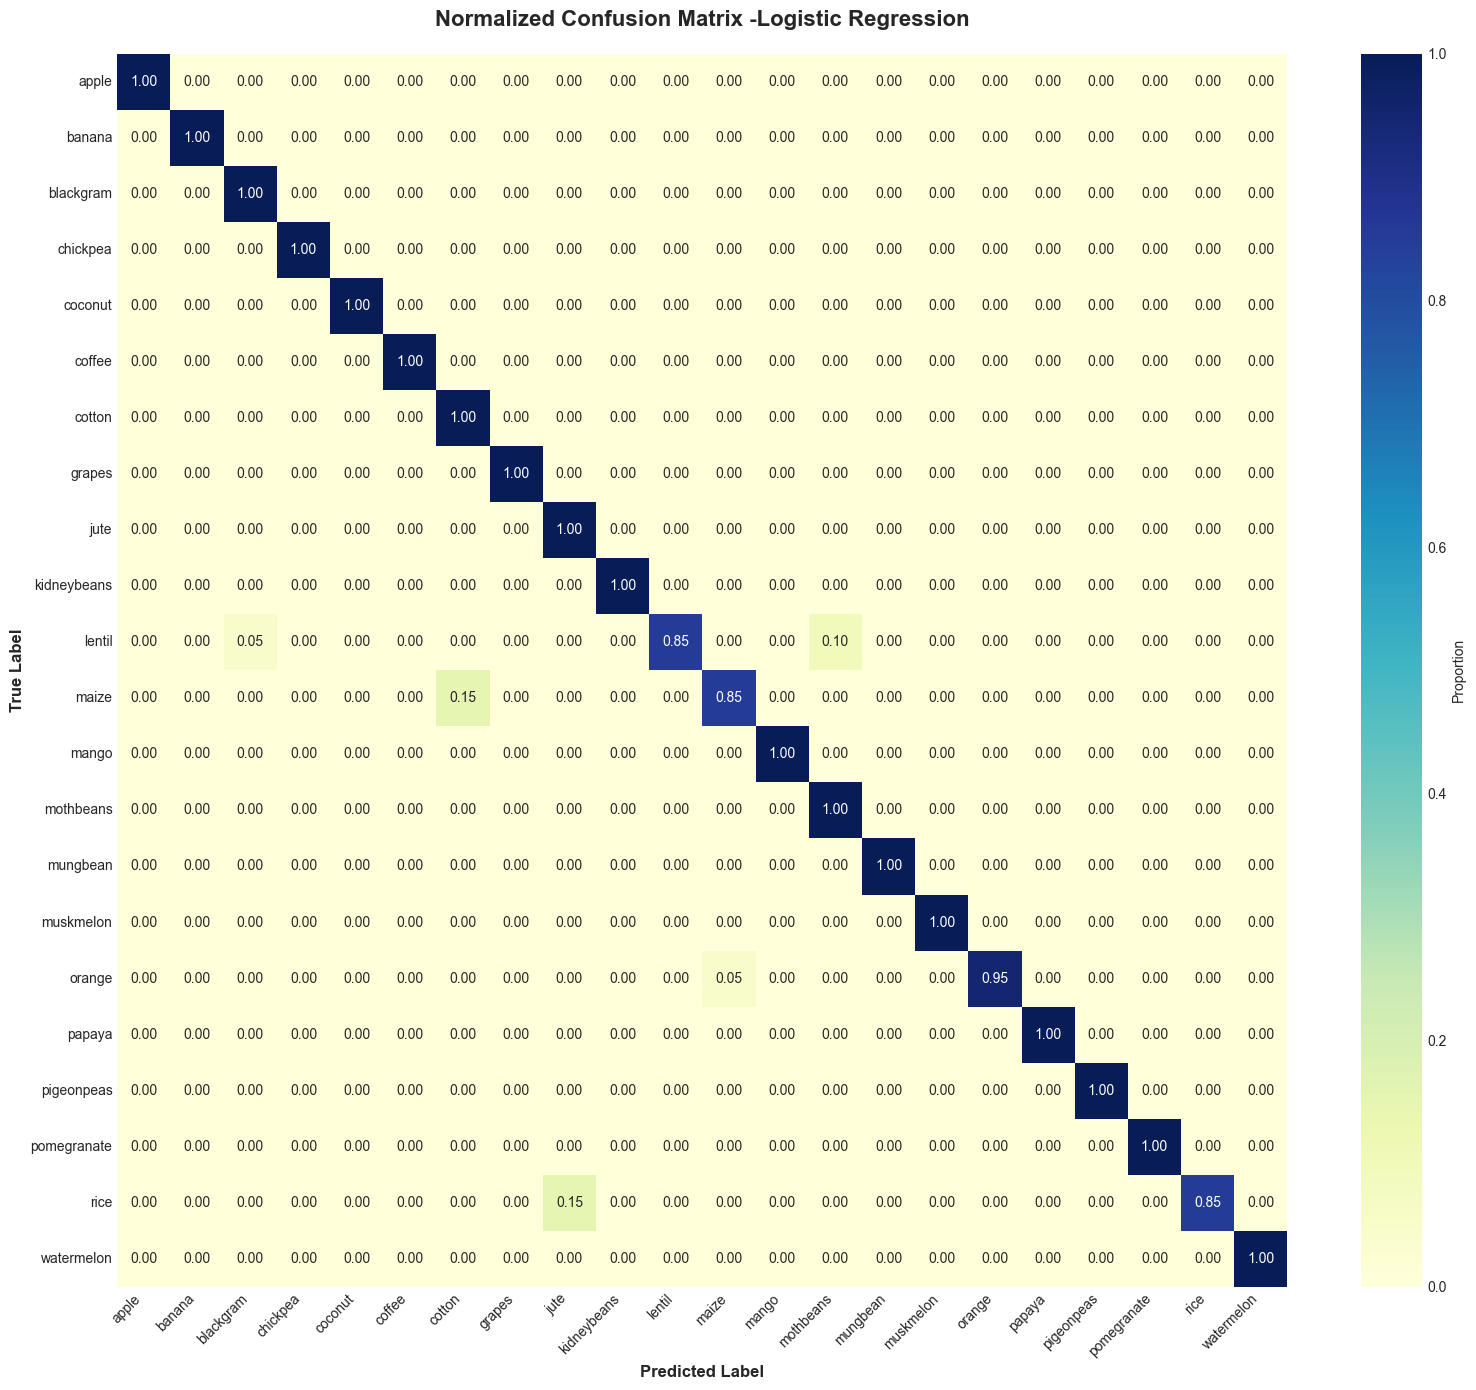

In [34]:
plt.figure(figsize=(16,14))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='YlGnBu',  xticklabels=label_encoder.classes_,  yticklabels=label_encoder.classes_,
            cbar_kws={'label': 'Proportion'})

plt.title("Normalized Confusion Matrix -Logistic Regression",fontsize=16,fontweight="bold",pad=20)
plt.xlabel("Predicted Label",fontsize=12,fontweight="bold")
plt.ylabel("True Label",fontsize=12,fontweight="bold")
plt.xticks(rotation=45,ha="right")
plt.yticks(rotation=0)

plt.tight_layout()
plt.savefig('../data/visualizations/25_logistic_regression_confusion_matrix_normalized.png', dpi=300, bbox_inches='tight')
print("\nSaved: 25_logistic_regression_confusion_matrix_normalized.png")
plt.show()

# Per-Class Performance Analysis

In [35]:
print("PER-CLASS PERFORMANCE ANALYSIS")

PER-CLASS PERFORMANCE ANALYSIS


Extract per-class metrics

In [36]:
class_metrics=[]
for i,crop in enumerate(label_encoder.classes_):
    class_metrics.append({
        "Crop":crop,
        "Precision":report_dict[crop]['precision'],
        "Recall":report_dict[crop]['recall'],
        "F1-Score":report_dict[crop]['f1-score'],
        "Support":report_dict[crop]['support']
    })

class_metrics_df=pd.DataFrame(class_metrics)
class_metrics_df=class_metrics_df.sort_values(by="F1-Score",ascending=False)

In [37]:
print("Top 5 Best Performing Crops:")
print(class_metrics_df.head(5).to_string(index=False))

Top 5 Best Performing Crops:
    Crop  Precision  Recall  F1-Score  Support
   apple        1.0     1.0       1.0     20.0
  banana        1.0     1.0       1.0     20.0
chickpea        1.0     1.0       1.0     20.0
 coconut        1.0     1.0       1.0     20.0
  coffee        1.0     1.0       1.0     20.0


In [38]:
print("Top 5 Worst Performing Crops:")
print(class_metrics_df.tail(5).to_string(index=False))

Top 5 Worst Performing Crops:
  Crop  Precision  Recall  F1-Score  Support
  jute   0.869565    1.00  0.930233     20.0
cotton   0.869565    1.00  0.930233     20.0
lentil   1.000000    0.85  0.918919     20.0
  rice   1.000000    0.85  0.918919     20.0
 maize   0.944444    0.85  0.894737     20.0


 Visualize per-class F1-scores


Saved: 26_logistic_regression_per_class_performance.png


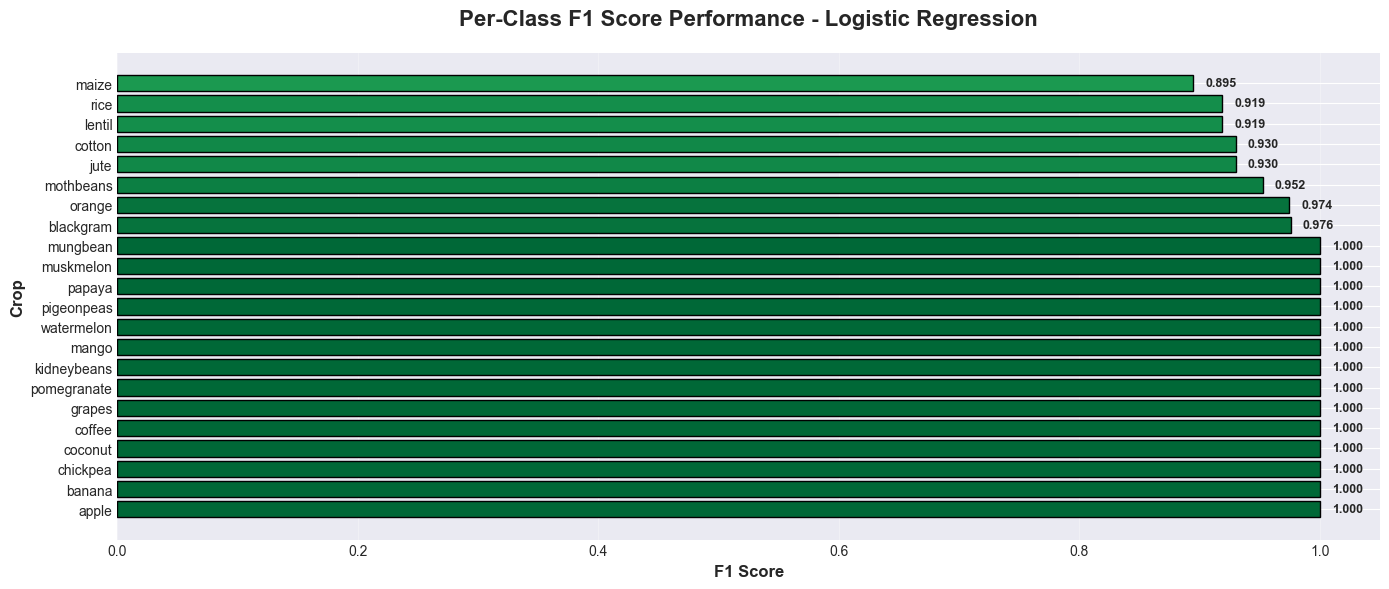

In [39]:
plt.figure(figsize=(14,6))
colors=plt.cm.RdYlGn(class_metrics_df["F1-Score"])
bars=plt.barh(class_metrics_df["Crop"],class_metrics_df["F1-Score"],color=colors,edgecolor="black")

plt.xlabel("F1 Score",fontsize=12,fontweight="bold")
plt.ylabel("Crop",fontsize=12,fontweight="bold")
plt.title("Per-Class F1 Score Performance - Logistic Regression",fontsize=16,fontweight="bold",pad=20)
plt.xlim(0,1.05)
plt.grid(axis="x",alpha=0.3)

# Adding value labels
for i,(crop,score) in enumerate(zip(class_metrics_df["Crop"],class_metrics_df["F1-Score"])):
    plt.text(score+0.01,i,f"{score:.3f}",va="center",fontsize=9,fontweight="bold")

plt.tight_layout()
plt.savefig('../data/visualizations/26_logistic_regression_per_class_performance.png', dpi=300, bbox_inches='tight')
print("\nSaved: 26_logistic_regression_per_class_performance.png")
plt.show()

# Feature Coefficients Analysis

In [40]:
print("FEATURE COEFFICIENTS ANALYSIS")

FEATURE COEFFICIENTS ANALYSIS


In [41]:
print("Model Coefficients Shape:", log_reg.coef_.shape)
print("Number of classes",log_reg.coef_.shape[0])
print("Number of features",log_reg.coef_.shape[1])

Model Coefficients Shape: (22, 39)
Number of classes 22
Number of features 39


Calculate mean absolute coefficient for each feature

In [42]:
feature_importance=np.abs(log_reg.coef_).mean(axis=0)

In [43]:
feature_importance_df=pd.DataFrame({
    "Feature":feature_names,
    "Importance":feature_importance
}).sort_values(by="Importance",ascending=False)

In [44]:
print("Top 15 Most Important Features:")
print(feature_importance_df.head(15).to_string(index=False))

Top 15 Most Important Features:
                  Feature  Importance
 humidity_category_Medium    0.619261
       water_stress_index    0.591048
             P_to_K_ratio    0.517845
                 rainfall    0.517751
              K_dominance    0.513911
                 humidity    0.507568
         P_ph_interaction    0.502653
              P_dominance    0.454503
                        P    0.454354
        rainfall_per_temp    0.442229
            climate_index    0.438764
temp_humidity_interaction    0.438764
           moisture_index    0.437321
       water_availability    0.437321
                        N    0.430622


Visualize top 20 features


Saved: 27_logistic_regression_feature_importance.png


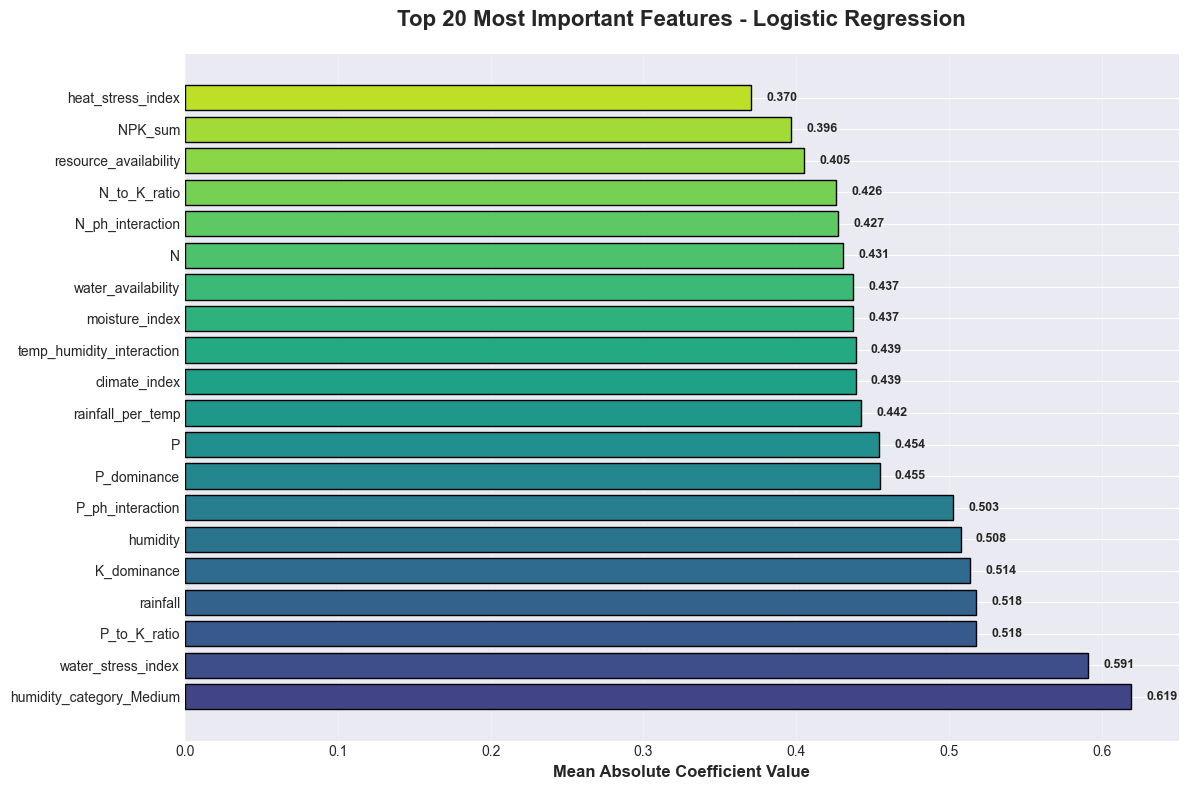

In [45]:
plt.figure(figsize=(12,8))
top_20_features=feature_importance_df.head(20)
colors=plt.cm.viridis(np.linspace(0.2,0.9,20))
bars=plt.barh(range(20),top_20_features["Importance"].values,color=colors,edgecolor="black")

plt.yticks(range(20),top_20_features["Feature"].values)
plt.xlabel("Mean Absolute Coefficient Value",fontsize=12,fontweight="bold")
plt.title("Top 20 Most Important Features - Logistic Regression",fontsize=16,fontweight="bold",pad=20)
plt.grid(axis="x",alpha=0.3)

for i, val in enumerate(top_20_features['Importance'].values):
    plt.text(val + 0.01, i, f'{val:.3f}', va='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.savefig('../data/visualizations/27_logistic_regression_feature_importance.png', dpi=300, bbox_inches='tight')
print("\nSaved: 27_logistic_regression_feature_importance.png")
plt.show()

Prediction Confidence Analysis

In [47]:
print("PREDICTION CONFIDENCE ANALYSIS")

PREDICTION CONFIDENCE ANALYSIS


Get maximum probabilities (confidence) for each prediction

In [48]:
test_confidence=np.max(y_test_pred_proba,axis=1)

In [51]:
print("Confidence Statistics:")
print(f"Mean Confidence:{np.mean(test_confidence) * 100:.2f} %")
print(f"Median Confidence:{np.median(test_confidence) * 100:.2f} %")
print(f"Confidence Std Dev:{np.std(test_confidence) * 100:.2f} %")
print(f"Min confidence: {test_confidence.min() * 100:.2f} %")
print(f"Max confidence: {test_confidence.max() * 100:.2f} %")

Confidence Statistics:
Mean Confidence:94.71 %
Median Confidence:98.50 %
Confidence Std Dev:9.94 %
Min confidence: 36.35 %
Max confidence: 100.00 %


Confidence distribution


Saved: 28_logistic_regression_confidence_distribution.png


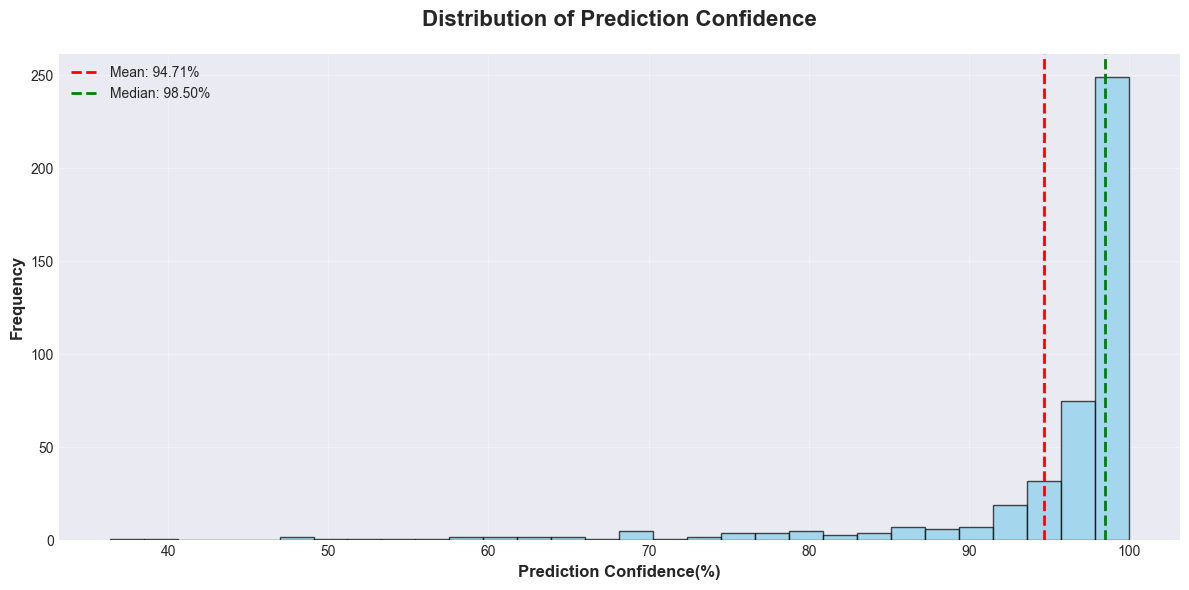

In [52]:
plt.figure(figsize=(12,6))
plt.hist(test_confidence*100,bins=30,color="skyblue",edgecolor="black",alpha=0.7)
plt.axvline(test_confidence.mean() * 100, color='red', linestyle='--', linewidth=2,label=f'Mean: {test_confidence.mean()*100:.2f}%')
plt.axvline(np.median(test_confidence) * 100, color='green', linestyle='--', linewidth=2, 
            label=f'Median: {np.median(test_confidence)*100:.2f}%')
plt.xlabel('Prediction Confidence(%)', fontsize=12, fontweight='bold')
plt.ylabel('Frequency',fontsize=12,fontweight='bold')
plt.title('Distribution of Prediction Confidence',fontsize=16, fontweight='bold', pad=20)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../data/visualizations/28_logistic_regression_confidence_distribution.png', dpi=300, bbox_inches='tight')
print("\nSaved: 28_logistic_regression_confidence_distribution.png")
plt.show()

Confidence vs Correctness

In [53]:
print("Confidence By Correctness Analysis")

Confidence By Correctness Analysis


In [54]:
correct_mask=y_test==y_test_pred
correct_confidence=test_confidence[correct_mask]
incorrect_confidence=test_confidence[~correct_mask] 

In [55]:
print(f"Correct predictions Mean confidence: {correct_confidence.mean() * 100:.2f}%")
print(f"Incorrect predictions - Mean confidence: {incorrect_confidence.mean() * 100:.2f}%")
print(f"Confidence gap:{(correct_confidence.mean()-incorrect_confidence.mean()) * 100:.2f}%")

Correct predictions Mean confidence: 95.57%
Incorrect predictions - Mean confidence: 57.55%
Confidence gap:38.02%


# Save Model and Results

In [57]:
print("Saving model and results")

Saving model and results


Save trained model

In [58]:
model_path='../models/logistic_regression_model.pkl'
with open(model_path,'wb') as f:
    pickle.dump(log_reg, f)

print(f"\n model saved to:{model_path}")


 model saved to:../models/logistic_regression_model.pkl


In [59]:
model_summary = {
    'Model': ['Logistic Regression'],
    'Train_Accuracy': [train_accuracy],
    'Test_Accuracy': [test_accuracy],
    'Train_Precision': [train_precision],
    'Test_Precision': [test_precision],
    'Train_Recall': [train_recall],
    'Test_Recall': [test_recall],
    'Train_F1': [train_f1],
    'Test_F1': [test_f1],
    'Training_Time_sec': [training_time],
    'Prediction_Time_ms': [test_pred_time/len(y_test)*1000],
    'Overfitting_Gap': [accuracy_diff]
}


In [60]:
summary_df = pd.DataFrame(model_summary)
summary_df.to_csv('../data/results/logistic_regression_summary.csv', index=False)
print("Performance summary saved to: ../data/results/logistic_regression_summary.csv")

Performance summary saved to: ../data/results/logistic_regression_summary.csv


Save predictions for error analysis

In [65]:
predictions_df = pd.DataFrame({
    'True_Label_Encoded': y_test,
    'Predicted_Label_Encoded': y_test_pred,
    'True_Label': [label_encoder.classes_[i] for i in y_test],
    'Predicted_Label': [label_encoder.classes_[i] for i in y_test_pred],
    'Confidence': np.max(y_test_pred_proba, axis=1),
    'Correct': y_test == y_test_pred
})

In [66]:
predictions_df.to_csv('../data/results/logistic_regression_predictions.csv', index=False)
print("Predictions saved to: ../data/results/logistic_regression_predictions.csv")

Predictions saved to: ../data/results/logistic_regression_predictions.csv
